# Análisis de Componentes Principales (PCA)

##### 1. Análisis de Variables Categóricas y Evaluación para PCA

In [8]:
import pandas as pd

data_path = "../../data/movies_clean.csv"
df = pd.read_csv(data_path)

print(df.head())

# Identificar las variables categóricas
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

# Mostrar las variables categóricas
print(" Variables categóricas en el dataset:")
print(categorical_vars)

# Ver los valores únicos en algunas de estas variables
for var in categorical_vars[:5]:  # Mostramos solo las primeras 5 variables categóricas
    print(f"\n {var}:")
    print(df[var].value_counts().head(10))  # Mostrar solo las 10 categorías más comunes

# Evaluar las categorías únicas en cada variable
unique_counts = df[categorical_vars].nunique()
print("\n Número de categorías únicas por variable categórica:")
print(unique_counts)

# Estrategia de transformación
# Eliminamos variables con muchas categorías o sin relevancia
columns_to_drop = ["id", "title", "releaseDate", "homePage", "actorsCharacter"]
df_filtered = df.drop(columns=columns_to_drop)

# Aplicamos One-Hot Encoding a variables con pocas categorías
low_cardinality_vars = unique_counts[unique_counts < 10].index.tolist()
df_encoded = pd.get_dummies(df_filtered, columns=low_cardinality_vars)

#  Revisar el nuevo dataset con variables categóricas transformadas
print("\n Datos transformados con One-Hot Encoding:")
print(df_encoded.info())

# Comparar la cantidad de variables antes y después
print(f"\n Columnas originales: {df.shape[1]} | Columnas después de transformación: {df_encoded.shape[1]}")

if df_encoded.shape[1] > df.shape[1] * 1.5: 
    print("\n Se agregaron muchas variables, lo que puede afectar el PCA. Se recomienda evaluar su impacto antes de incluirlas.")
else:
    print("\n La transformación categórica no añadió demasiadas variables, por lo que podría considerarse en el PCA.")


   id    budget                            genres  \
0   5   4000000                      Crime|Comedy   
1   6  21000000             Action|Thriller|Crime   
2  11  11000000  Adventure|Action|Science Fiction   
3  12  94000000                  Animation|Family   
4  13  55000000              Comedy|Drama|Romance   

                                            homePage  \
0          https://www.miramax.com/movie/four-rooms/   
1                                                NaN   
2  http://www.starwars.com/films/star-wars-episod...   
3              http://movies.disney.com/finding-nemo   
4                                                NaN   

                            productionCompany productionCompanyCountry  \
0                        Miramax|A Band Apart                    US|US   
1  Universal Pictures|Largo Entertainment|JVC                 US|US|JP   
2                  Lucasfilm|20th Century Fox                    US|US   
3                                       Pixar   

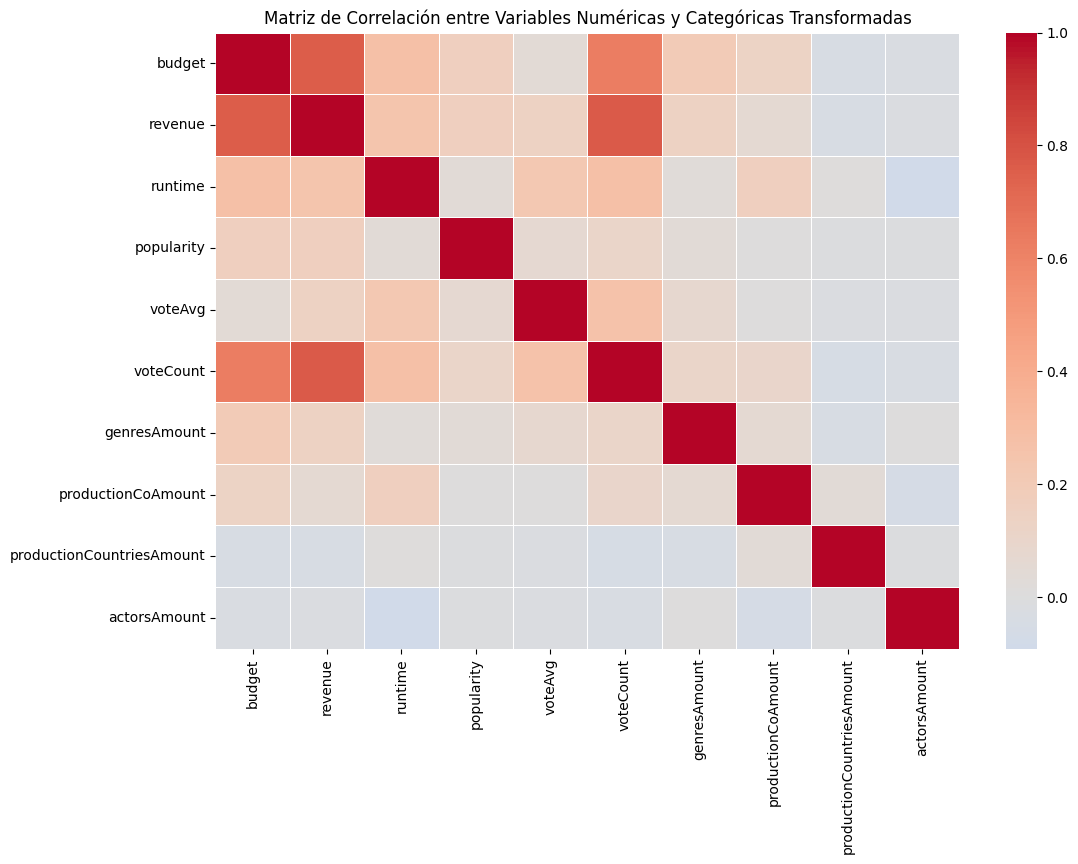


 Correlaciones más altas con las variables categóricas transformadas:
budget                     budget                       1.000000
popularity                 popularity                   1.000000
runtime                    runtime                      1.000000
revenue                    revenue                      1.000000
productionCoAmount         productionCoAmount           1.000000
genresAmount               genresAmount                 1.000000
actorsAmount               actorsAmount                 1.000000
productionCountriesAmount  productionCountriesAmount    1.000000
voteCount                  voteCount                    1.000000
voteAvg                    voteAvg                      1.000000
revenue                    voteCount                    0.768255
voteCount                  revenue                      0.768255
budget                     revenue                      0.757454
revenue                    budget                       0.757454
voteCount          

In [9]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

# Asegurar que solo se usen columnas numéricas
df_numeric = df_encoded.select_dtypes(include=[np.number])

# Calcular la matriz de correlación solo con datos numéricos
correlation_matrix = df_numeric.corr()

# Generar un mapa de calor para visualizar la correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Matriz de Correlación entre Variables Numéricas y Categóricas Transformadas")
plt.show()

# Mostrar las correlaciones más altas con las variables categóricas transformadas
print("\n Correlaciones más altas con las variables categóricas transformadas:")
print(correlation_matrix.unstack().sort_values(ascending=False).head(20))